In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
sns.set_theme(style='darkgrid', color_codes=True)

# Data information :

Most of the Attributes are self explicatory
- **Title** : the name of the game.


- **Release Date** : the date when the game was released.


- **ReleaseSeason** : the season in which the game was released.
    - 1 - Spring
    - 2 - Summer
    - 3 - Fall
    - 4 - Winter

    
- **Platform** : the platform in which the game was released , for example : Nintendo 64 , PlayStation , PC , xbox , etc..

- **Developer** : the name of the company which developed the game.
- **Genres** : represents all the genres of the game.
- **MainGenre** : each game initially had multiple genres , MainGenre is the genre which appears first in the list of genres (We assumed it was the dominant genre for the game).
              it is going to help us in visualizing the data and later on in our MachineLearning part.
- **Rating** : Rating Categories suggest age appropriateness , for example : E - Everyone , M - Mature 17+ , A - Adult only 18+ , etc..
- **FirstAward , SecondAward , ThirdAward** : At Metacrtic each game can contain a list of up to 3 awards/rankings it has won.
- **FirstPlaceAward** : Indicates wether the game has won first place in any of its awards/rankings (#1 -Award- / #1 -Ranking-)
    - 1 - The game has #1 Award/Ranking
    - 0 - The game has no #1 Award/Ranking
- **MetaScore** : The score given by professional game critics , scale is 0 - 100
- **NumberOfCritics** : amount of critics which scored/reviewed the game
- **PositiveMetaScore** : amount of critics which scored the game positively (Score 75-100)
- **MixedMetaScore** : amount of critics which scored the game mixed (Score 50-74)
- **NegativeMetaScore** : amount of critics which scored the game negatively (Score 0-49)
- **UserScore** : the score given to the game by the users , scale is 0-10 it gets changed later on to 0 - 100
- **NumberOfUsers** : amount of users which scored/reviewed the game
- **PositiveUserScore** : amount of users which gave the game a positive score
- **MixedUserScore** : amount of users which gave the game a mixed score
- **NegativeUserScore** : amount of users which gave the game a negative score

In [2]:
gamesDataFrame = pd.read_csv("HandledData.csv",header=0,sep=',')
gamesDataFrame.head()

,Title,Release Date,ReleaseSeason,Platform,Developer,Genres,MainGenre,Rating,FirstAward,SecondAward,...,MetaScore,NumberOfCritics,PositiveMetaScore,MixedMetaScore,NegativeMetaScore,UserScore,NumberOfUsers,PositiveUserScore,MixedUserScore,NegativeUserScore
0,The Legend of Zelda: Ocarina of Time,23/11/1998,3,Nintendo 64,Nintendo,"ActionAdventure,Fantasy",ActionAdventure,E,#1 Best N64 Game of 1998,#1 Most Discussed N64 Game of 1998,...,99.0,22.0,22.0,0.0,0.0,9.1,6664.0,5974.0,227.0,463.0
1,Tony Hawk's Pro Skater 2,20/09/2000,3,PlayStation,Neversoft Entertainment,"Sports,Alternative,Skateboarding",Sports,T,#1 Best PS1 Game of 2000,#4 Most Discussed PS1 Game of 2000,...,98.0,19.0,19.0,0.0,0.0,7.4,744.0,521.0,88.0,135.0
2,Grand Theft Auto IV,29/04/2008,1,PlayStation 3,Rockstar North,"ActionAdventure,Modern,Modern,Open-World",ActionAdventure,M,#1 Best PS3 Game of 2008,#2 Most Discussed PS3 Game of 2008,...,98.0,64.0,64.0,0.0,0.0,7.8,4354.0,3059.0,710.0,585.0
3,SoulCalibur,08/09/1999,3,Dreamcast,Namco,"Action,Fighting,3D",Action,T,#1 Best Dreamcast Game of 1999,#1 Most Discussed Dreamcast Game of 1999,...,98.0,24.0,24.0,0.0,0.0,8.5,361.0,298.0,25.0,38.0
4,Grand Theft Auto IV,29/04/2008,1,Xbox 360,Rockstar North,"ActionAdventure,Modern,Modern,Open-World",ActionAdventure,M,#1 Best Xbox 360 Game of 2008,#1 Most Discussed Xbox 360 Game of 2008,...,98.0,86.0,86.0,0.0,0.0,7.9,3543.0,2564.0,536.0,443.0


In [3]:
gamesDataFrame.describe()

,ReleaseSeason,FirstPlaceAward,MetaScore,NumberOfCritics,PositiveMetaScore,MixedMetaScore,NegativeMetaScore,UserScore,NumberOfUsers,PositiveUserScore,MixedUserScore,NegativeUserScore
count,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000
mean,2.482034,0.197549,70.668370,23.019452,13.204850,8.265085,1.548631,6.980449,203.010117,134.475359,24.733611,43.858201
std,1.034292,0.398160,12.301318,17.325388,16.049654,7.535624,3.300897,1.307059,1364.318974,809.215120,64.017240,567.201877
min,1.000000,0.000000,11.000000,6.000000,0.000000,0.000000,0.000000,0.200000,4.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,64.000000,10.000000,3.000000,3.000000,0.000000,6.400000,15.000000,8.000000,2.000000,3.000000
50%,3.000000,0.000000,72.000000,17.000000,7.000000,6.000000,0.000000,7.200000,40.000000,24.000000,7.000000,7.000000
75%,3.000000,0.000000,80.000000,30.000000,17.000000,11.000000,2.000000,7.900000,153.000000,95.000000,24.000000,24.000000
max,4.000000,1.000000,99.000000,126.000000,119.000000,65.000000,51.000000,9.700000,156877.000000,81624.000000,998.000000,67060.000000


In [4]:
def plotValueCounts(columnName,limit = 30):
    counts = []
    names = []
    count = 0

    for key,value in gamesDataFrame[columnName].value_counts().items():
        if count < limit: 
            counts.append(value)
            names.append(key)
            count += 1
        else:
            break
    
    sns.catplot(data=gamesDataFrame, x=names, y=counts, kind='bar', aspect=4)
    plt.ylabel('Amount of Games',fontsize=15,fontweight='bold')
    plt.xlabel(columnName,fontsize=15,fontweight='bold')
    plt.title('Top {}'.format(columnName),fontsize=25,fontweight='bold')
    plt.xticks(rotation='vertical')

From the following graphs we can see amount of games by Platform , MainGenre and Developer 
by example we can infer that there are more pc games, more games which belong to Action genre and there are more games that were created  by "capcom" company

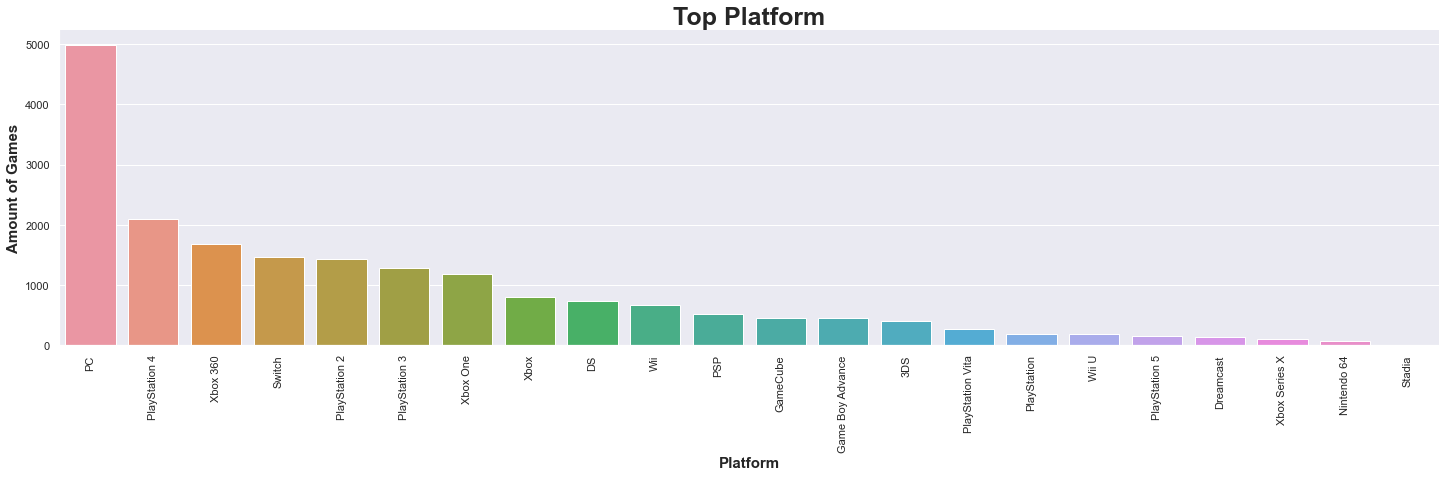

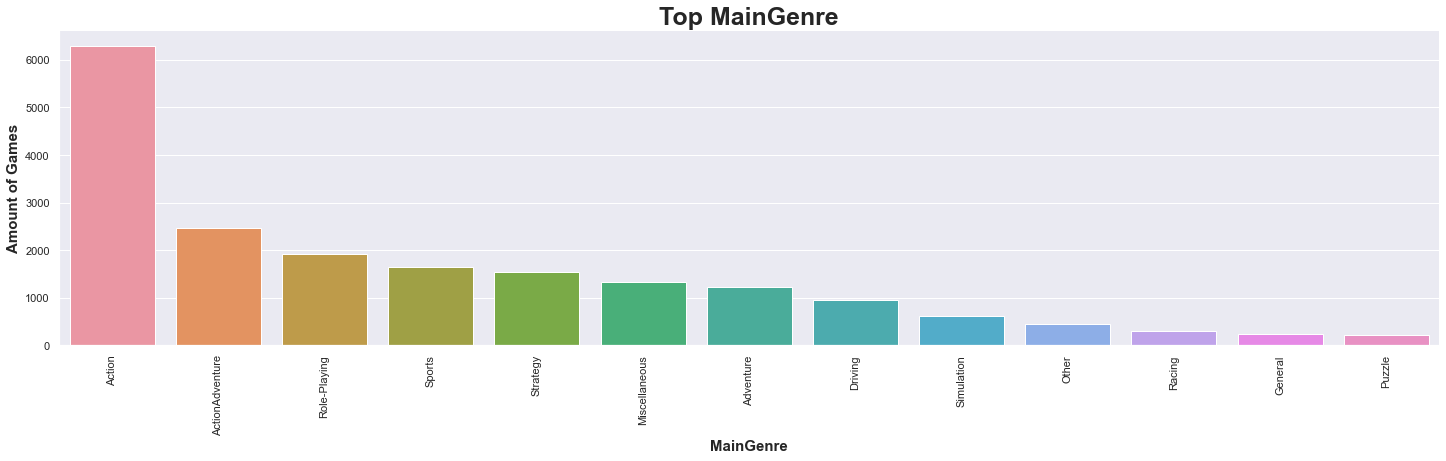

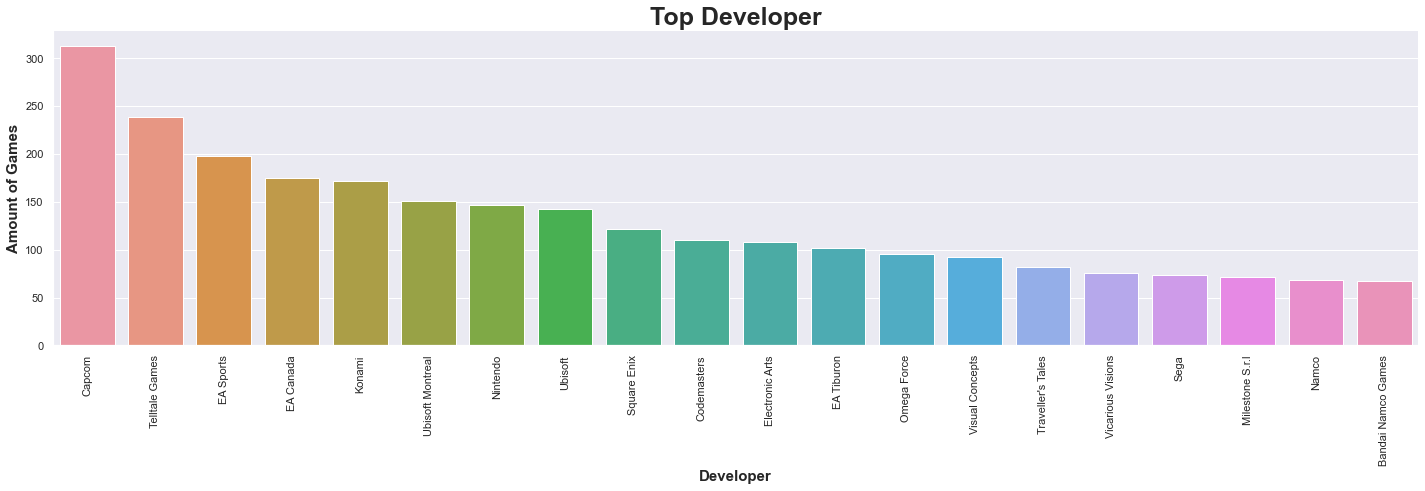

In [5]:
plotValueCounts("Platform")
plotValueCounts("MainGenre")
plotValueCounts("Developer",20)

It can be concluded that there is a direct relationship between the number of critics and reviews in reference to amount of positive reviews.
it may indicated the following:  if critic chose to rank and review , the rating is probably positive. is also infer that are more positive reviews compared to the other reviews.

<ipython-input-6-2e22cb682168>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  resultDF =  gamesDataFrame.groupby('MainGenre')['NumberOfCritics','PositiveMetaScore','MixedMetaScore','NegativeMetaScore'].sum()
<ipython-input-6-2e22cb682168>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  resultDF =  gamesDataFrame.groupby('MainGenre')['NumberOfUsers','PositiveUserScore','MixedUserScore','NegativeUserScore'].sum()


Text(0.5, 1.0, 'Distributes of critics reviews')

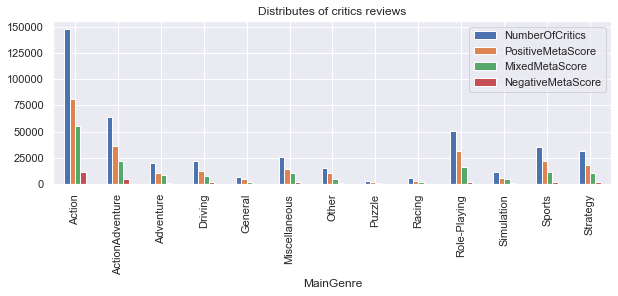

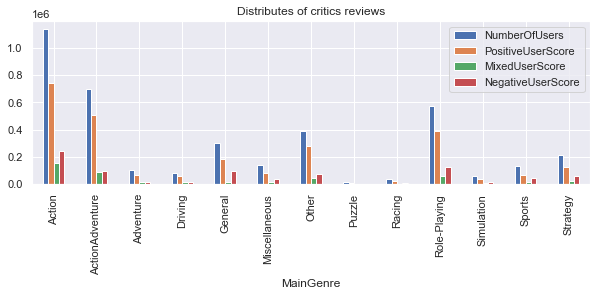

In [6]:
resultDF =  gamesDataFrame.groupby('MainGenre')['NumberOfCritics','PositiveMetaScore','MixedMetaScore','NegativeMetaScore'].sum()
resultDF.plot(kind='bar',figsize=(10,3))
plt.title('Distributes of critics reviews')
resultDF =  gamesDataFrame.groupby('MainGenre')['NumberOfUsers','PositiveUserScore','MixedUserScore','NegativeUserScore'].sum()
resultDF.plot(kind='bar',figsize=(10,3))
plt.title('Distributes of critics reviews')

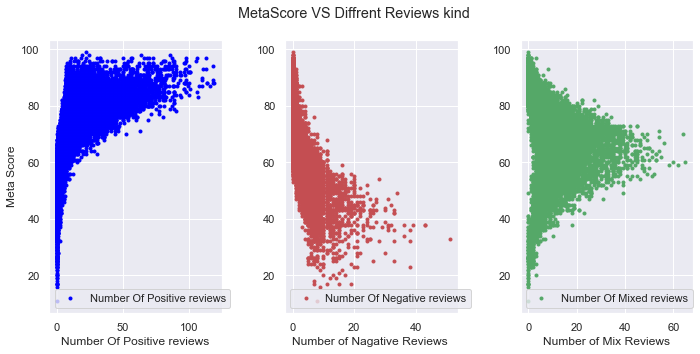

In [7]:
fig, ax = plt.subplots(1, 3,figsize=(10,5))
ax[0].scatter(gamesDataFrame['PositiveMetaScore'],gamesDataFrame['MetaScore'], color='blue',marker='.', label='Number Of Positive reviews')
ax[0].set_ylabel('Meta Score')
ax[0].set_xlabel('Number Of Positive reviews')
ax[0].legend()
ax[1].scatter(gamesDataFrame['NegativeMetaScore'],gamesDataFrame['MetaScore'], color='r', marker='.', label='Number Of Negative reviews')
ax[1].set_xlabel('Number of Nagative Reviews ')
ax[1].legend()
ax[2].scatter(gamesDataFrame['MixedMetaScore'],gamesDataFrame['MetaScore'], color='g' ,marker='.', label='Number Of Mixed reviews')
ax[2].set_xlabel('Number of Mix Reviews')
ax[2].legend()
fig.suptitle('MetaScore VS Diffrent Reviews kind')
fig.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MetaScore', ylabel='UserScore'>

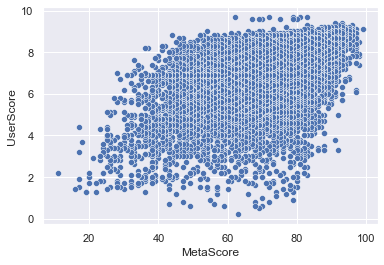

In [8]:
sns.scatterplot(gamesDataFrame['MetaScore'],gamesDataFrame['UserScore'])

Text(0.5, 1.0, 'Genres Distribution')

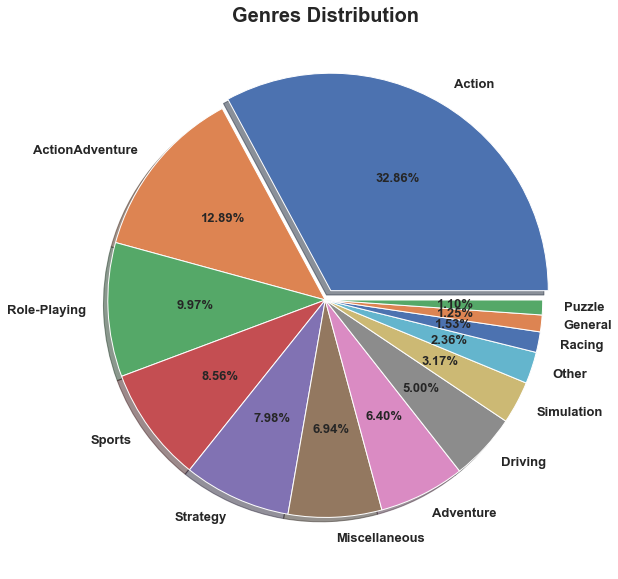

In [9]:

values = gamesDataFrame['MainGenre'].value_counts().values.tolist()
labels = gamesDataFrame['MainGenre'].value_counts().index.tolist()
explodeList = [0 for i in range(len(labels))]
explodeList[0] = 0.05

plt.figure(figsize=(20,10))
plt.pie(values , labels=labels ,textprops={'fontsize':13 , 'fontweight':'bold'},explode=explodeList,shadow=True,autopct='%.2f%%')
plt.title("Genres Distribution",fontsize=20 ,fontweight='bold')

Text(0.5, 1.0, 'Release date Season Distribution')

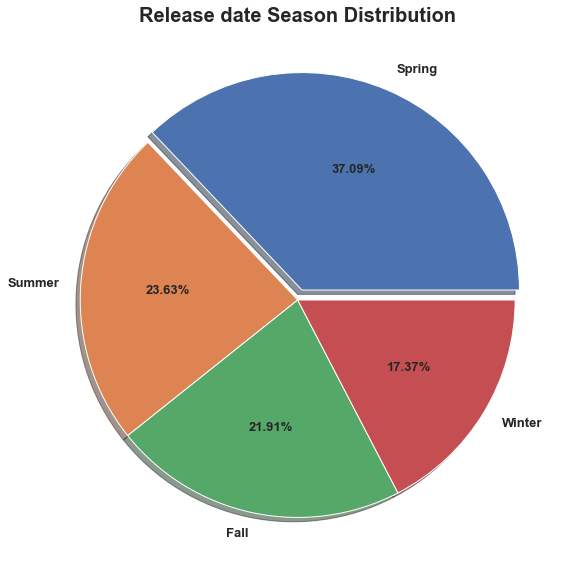

In [10]:
values = gamesDataFrame['ReleaseSeason'].value_counts().values.tolist()
labels = ['Spring','Summer','Fall','Winter']
explodeList = [0 for i in range(len(labels))]
explodeList[0] = 0.05

plt.figure(figsize=(20,10))
plt.pie(values , labels=labels,textprops={'fontsize':13 , 'fontweight':'bold'},explode=explodeList,shadow=True,autopct='%.2f%%')
plt.title("Release date Season Distribution",fontsize=20 ,fontweight='bold')

In [11]:
def CreatePlotMean(df,valueToGropBy,columns,title):
    if(columns != None):
        p = df.groupby(valueToGropBy)[columns].mean()
        p.plot(kind='bar',figsize=(25,5))
        plt.ylabel('Score',fontsize=15,fontweight='bold')
        plt.xlabel(valueToGropBy,fontsize=15,fontweight='bold')
        plt.title(title,fontsize=25,fontweight='bold')


The relation between MetaScore and UserScore 

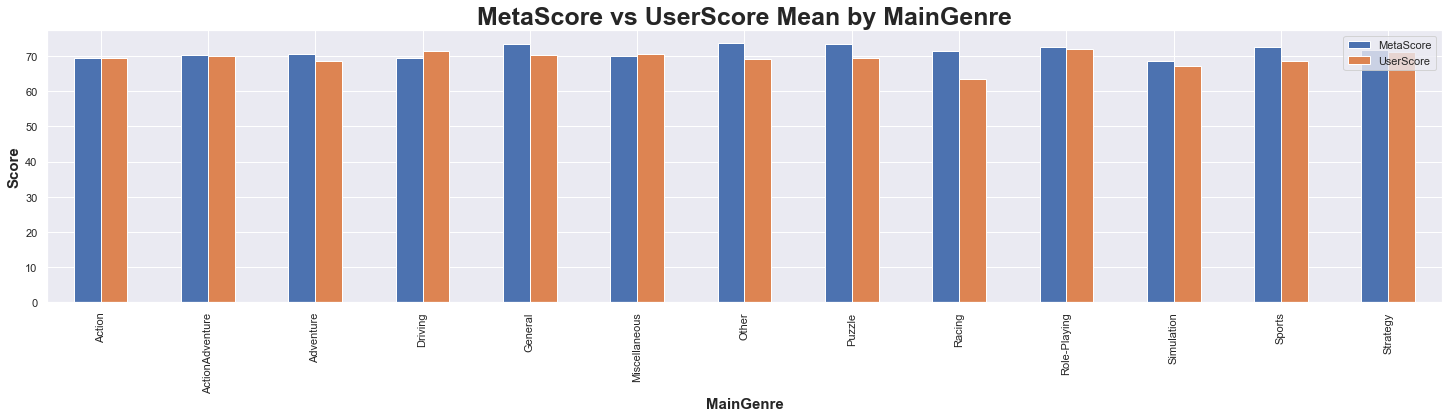

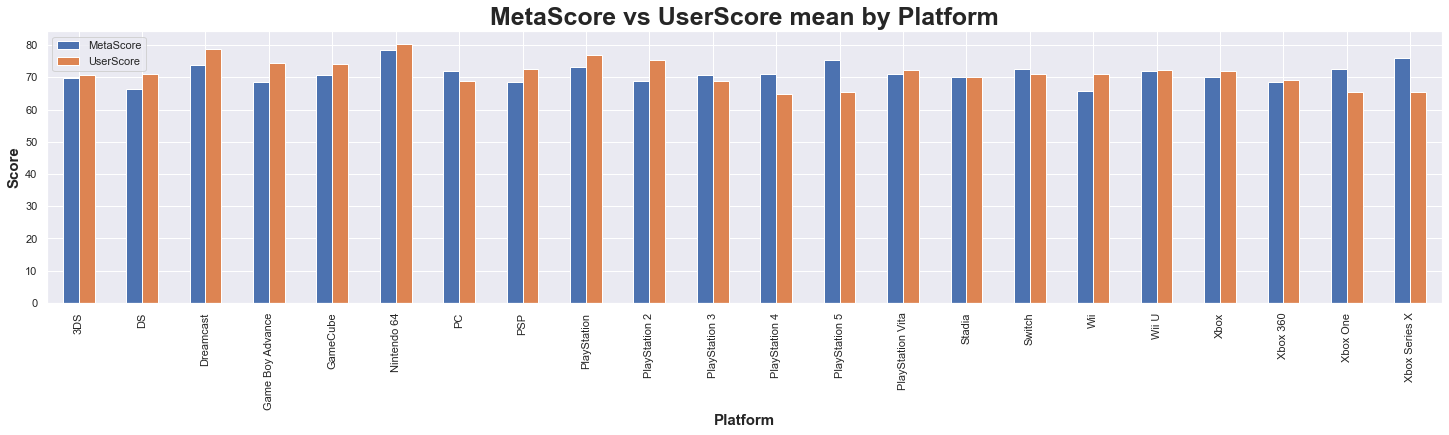

In [12]:
#Make UserScore scale the same as MetaScore
gamesDataFrame['UserScore'] = gamesDataFrame['UserScore'] * 10

CreatePlotMean(gamesDataFrame,'MainGenre',['MetaScore','UserScore'],'MetaScore vs UserScore Mean by MainGenre')
CreatePlotMean(gamesDataFrame,'Platform',['MetaScore','UserScore'],'MetaScore vs UserScore mean by Platform')

Showing how many games has won first place award by platform and MainGenre

Text(0.5, 0.98, 'Count of FirstPlaceAward by MainGenre and Platform')

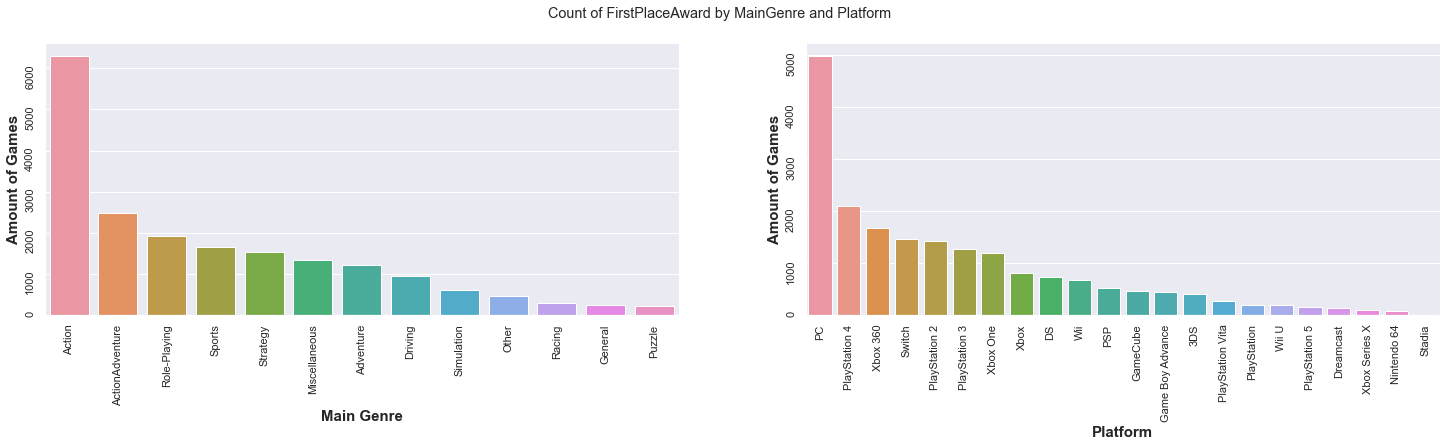

In [13]:
mainGenreCount = gamesDataFrame.groupby('MainGenre')['FirstPlaceAward'].count().sort_values(ascending=False)
platformCount = gamesDataFrame.groupby('Platform')['FirstPlaceAward'].count().sort_values(ascending=False)

fig, axs = plt.subplots(1,2, figsize=(25,5))

sns.barplot(x=mainGenreCount.index, y=mainGenreCount.values, ax=axs[0])
axs[0].set_ylabel('Amount of Games',fontsize=15,fontweight='bold')
axs[0].set_xlabel('Main Genre',fontsize=15,fontweight='bold')
axs[0].tick_params(labelrotation=90)

sns.barplot(x=platformCount.index, y=platformCount.values, ax=axs[1])   
axs[1].set_ylabel('Amount of Games',fontsize=15,fontweight='bold')
axs[1].set_xlabel('Platform',fontsize=15,fontweight='bold')
axs[1].tick_params(labelrotation=90)

fig.suptitle("Count of FirstPlaceAward by MainGenre and Platform")

The mean of the different type of scores : Positive,Mixed and Negative for UserScore and MetaScore

<ipython-input-14-472f37cf99d8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  userScoreTypeOfScoreMean = gamesDataFrame.groupby('UserScore')['PositiveUserScore', 'MixedUserScore', 'NegativeUserScore'].mean()
<ipython-input-14-472f37cf99d8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  metaScoreTypeOfScoreMean = gamesDataFrame.groupby('MetaScore')['PositiveMetaScore', 'MixedMetaScore','NegativeMetaScore'].mean()


Text(0.5, 0.98, 'Mean of the different type of scores by UserScore and MetaScore')

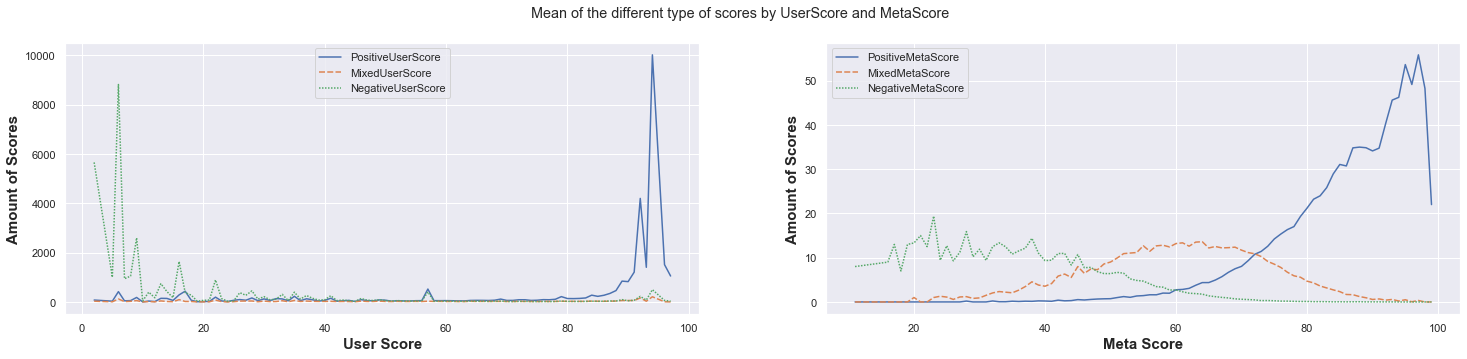

In [14]:
userScoreTypeOfScoreMean = gamesDataFrame.groupby('UserScore')['PositiveUserScore', 'MixedUserScore', 'NegativeUserScore'].mean()
metaScoreTypeOfScoreMean = gamesDataFrame.groupby('MetaScore')['PositiveMetaScore', 'MixedMetaScore','NegativeMetaScore'].mean()

fig, axs = plt.subplots(1,2, figsize=(25,5))

sns.lineplot(data=userScoreTypeOfScoreMean,ax=axs[0])
axs[0].set_ylabel('Amount of Scores',fontsize=15,fontweight='bold')
axs[0].set_xlabel('User Score',fontsize=15,fontweight='bold')


sns.lineplot(data=metaScoreTypeOfScoreMean,ax=axs[1])  
axs[1].set_ylabel('Amount of Scores',fontsize=15,fontweight='bold')
axs[1].set_xlabel('Meta Score',fontsize=15,fontweight='bold')

fig.suptitle("Mean of the different type of scores by UserScore and MetaScore")

We have added a new column for the release year of each game to visualize some attributes by their release year.

In [15]:
#Building a Release year column to help us visualize some info
releaseYear = []
for value in gamesDataFrame['Release Date']:
    dateValue = datetime.datetime.strptime(value, "%d/%m/%Y")
    releaseYear.append(dateValue.year)

gamesDataFrame["ReleaseYear"] = releaseYear
gamesDataFrame["ReleaseYear"] = pd.to_numeric(gamesDataFrame["ReleaseYear"])

#We have few games which there release year was before 2000
gamesDataFrame.drop(gamesDataFrame[gamesDataFrame['ReleaseYear'] < 2000].index,inplace=True)

Text(0.5, 1.0, 'Games season of release count through the years')

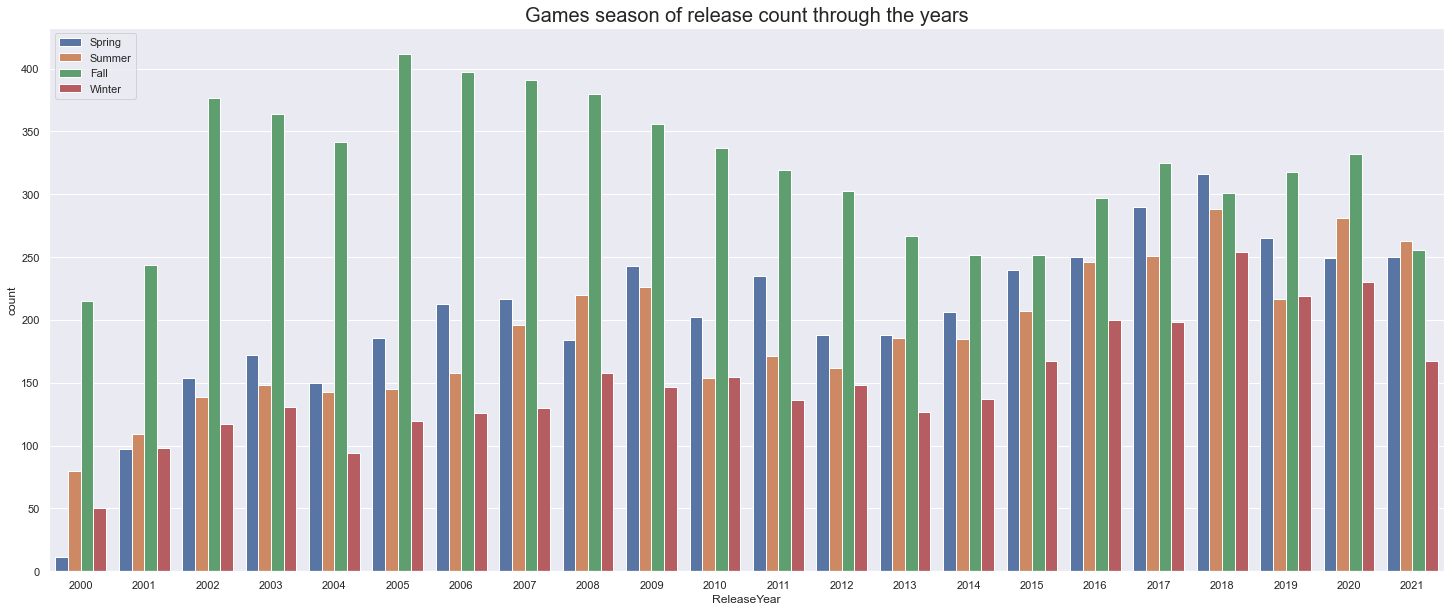

In [16]:
plt.figure(figsize=(25,10))
sns.countplot(x='ReleaseYear', hue='ReleaseSeason', data=gamesDataFrame)
plt.legend(loc='upper left',labels=['Spring','Summer','Fall','Winter'])
plt.title("Games season of release count through the years",size=20)

Text(0.5, 1.0, 'Main genres through the years')

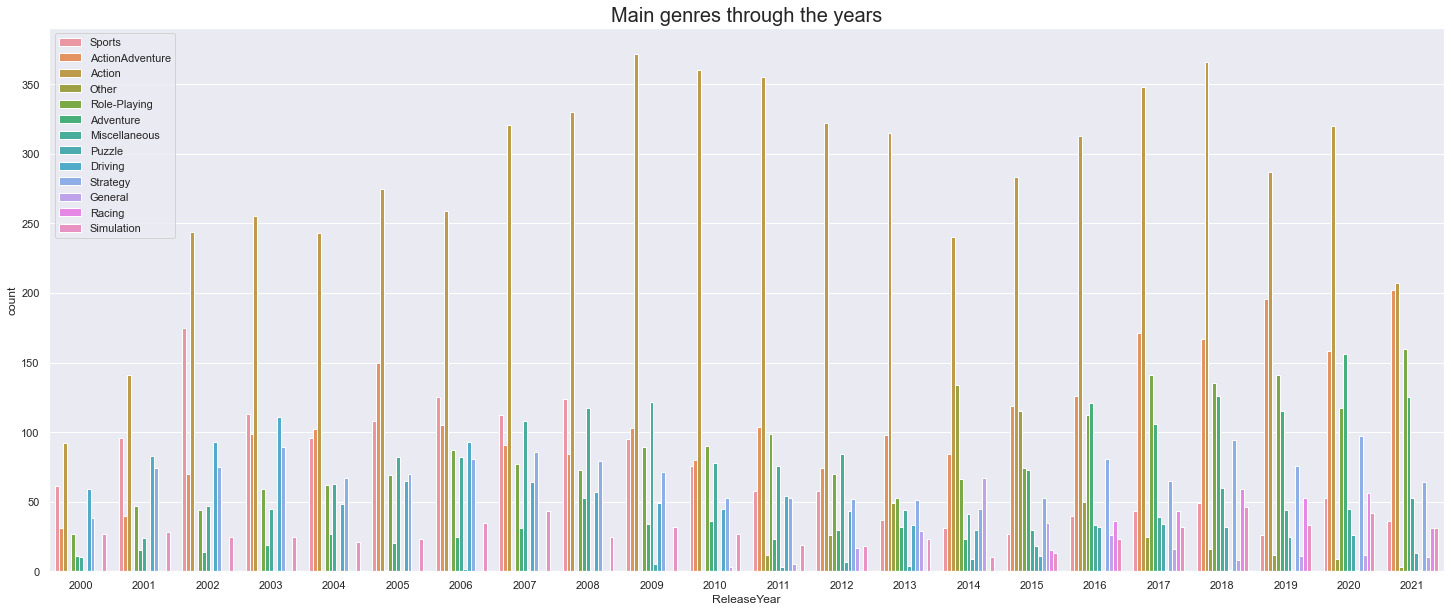

In [17]:
plt.figure(figsize=(25,10))
sns.countplot(x='ReleaseYear', hue='MainGenre', data=gamesDataFrame)
plt.legend(loc='upper left')
plt.title("Main genres through the years",size=20)

Text(0.5, 1.0, 'Games platform count through the years')

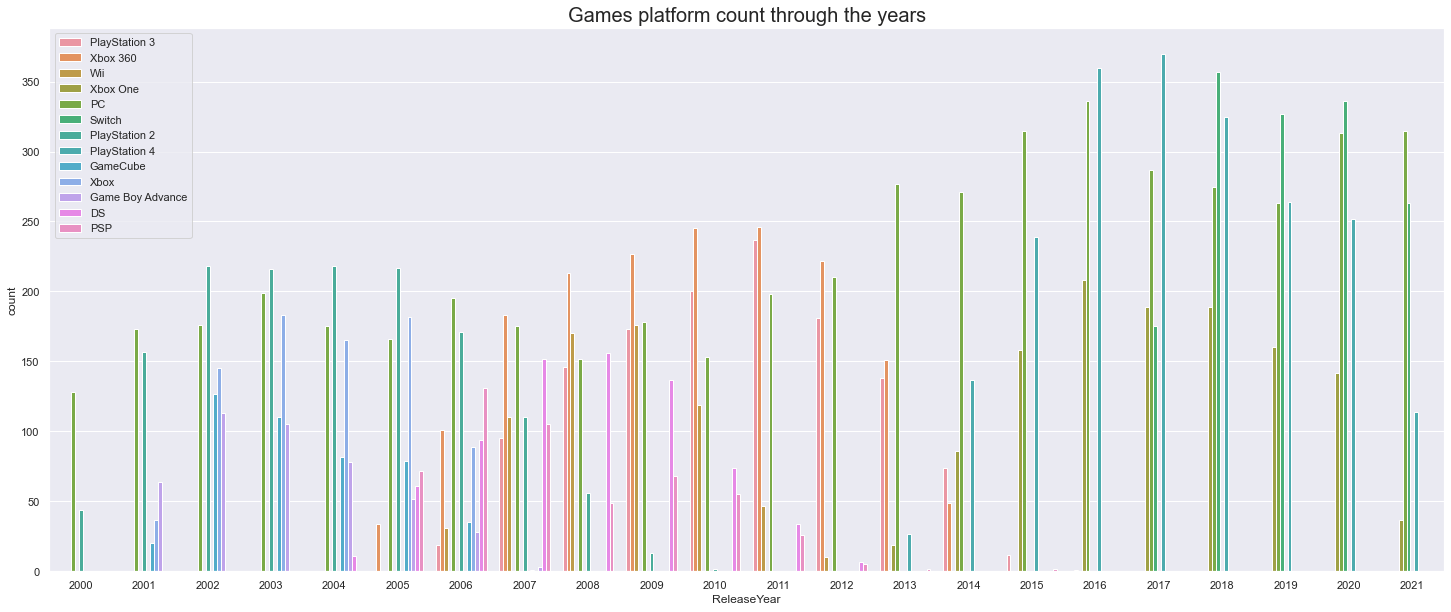

In [18]:
yearPlatformDf = gamesDataFrame[['ReleaseYear','Platform']].copy()
#Droping rows which containts a platform that has less then 400 appearances
platformsToDrop = []
for platform,count in yearPlatformDf['Platform'].value_counts().items():
    if(count < 400):
        platformsToDrop.append(platform)
yearPlatformDf.drop(yearPlatformDf[yearPlatformDf['Platform'].isin(platformsToDrop)].index,inplace=True)

plt.figure(figsize=(25,10))
sns.countplot(x='ReleaseYear', hue='Platform', data=yearPlatformDf)
plt.legend(loc='upper left')
plt.title("Games platform count through the years",size=20)

Pair plot for our continues attributes : 

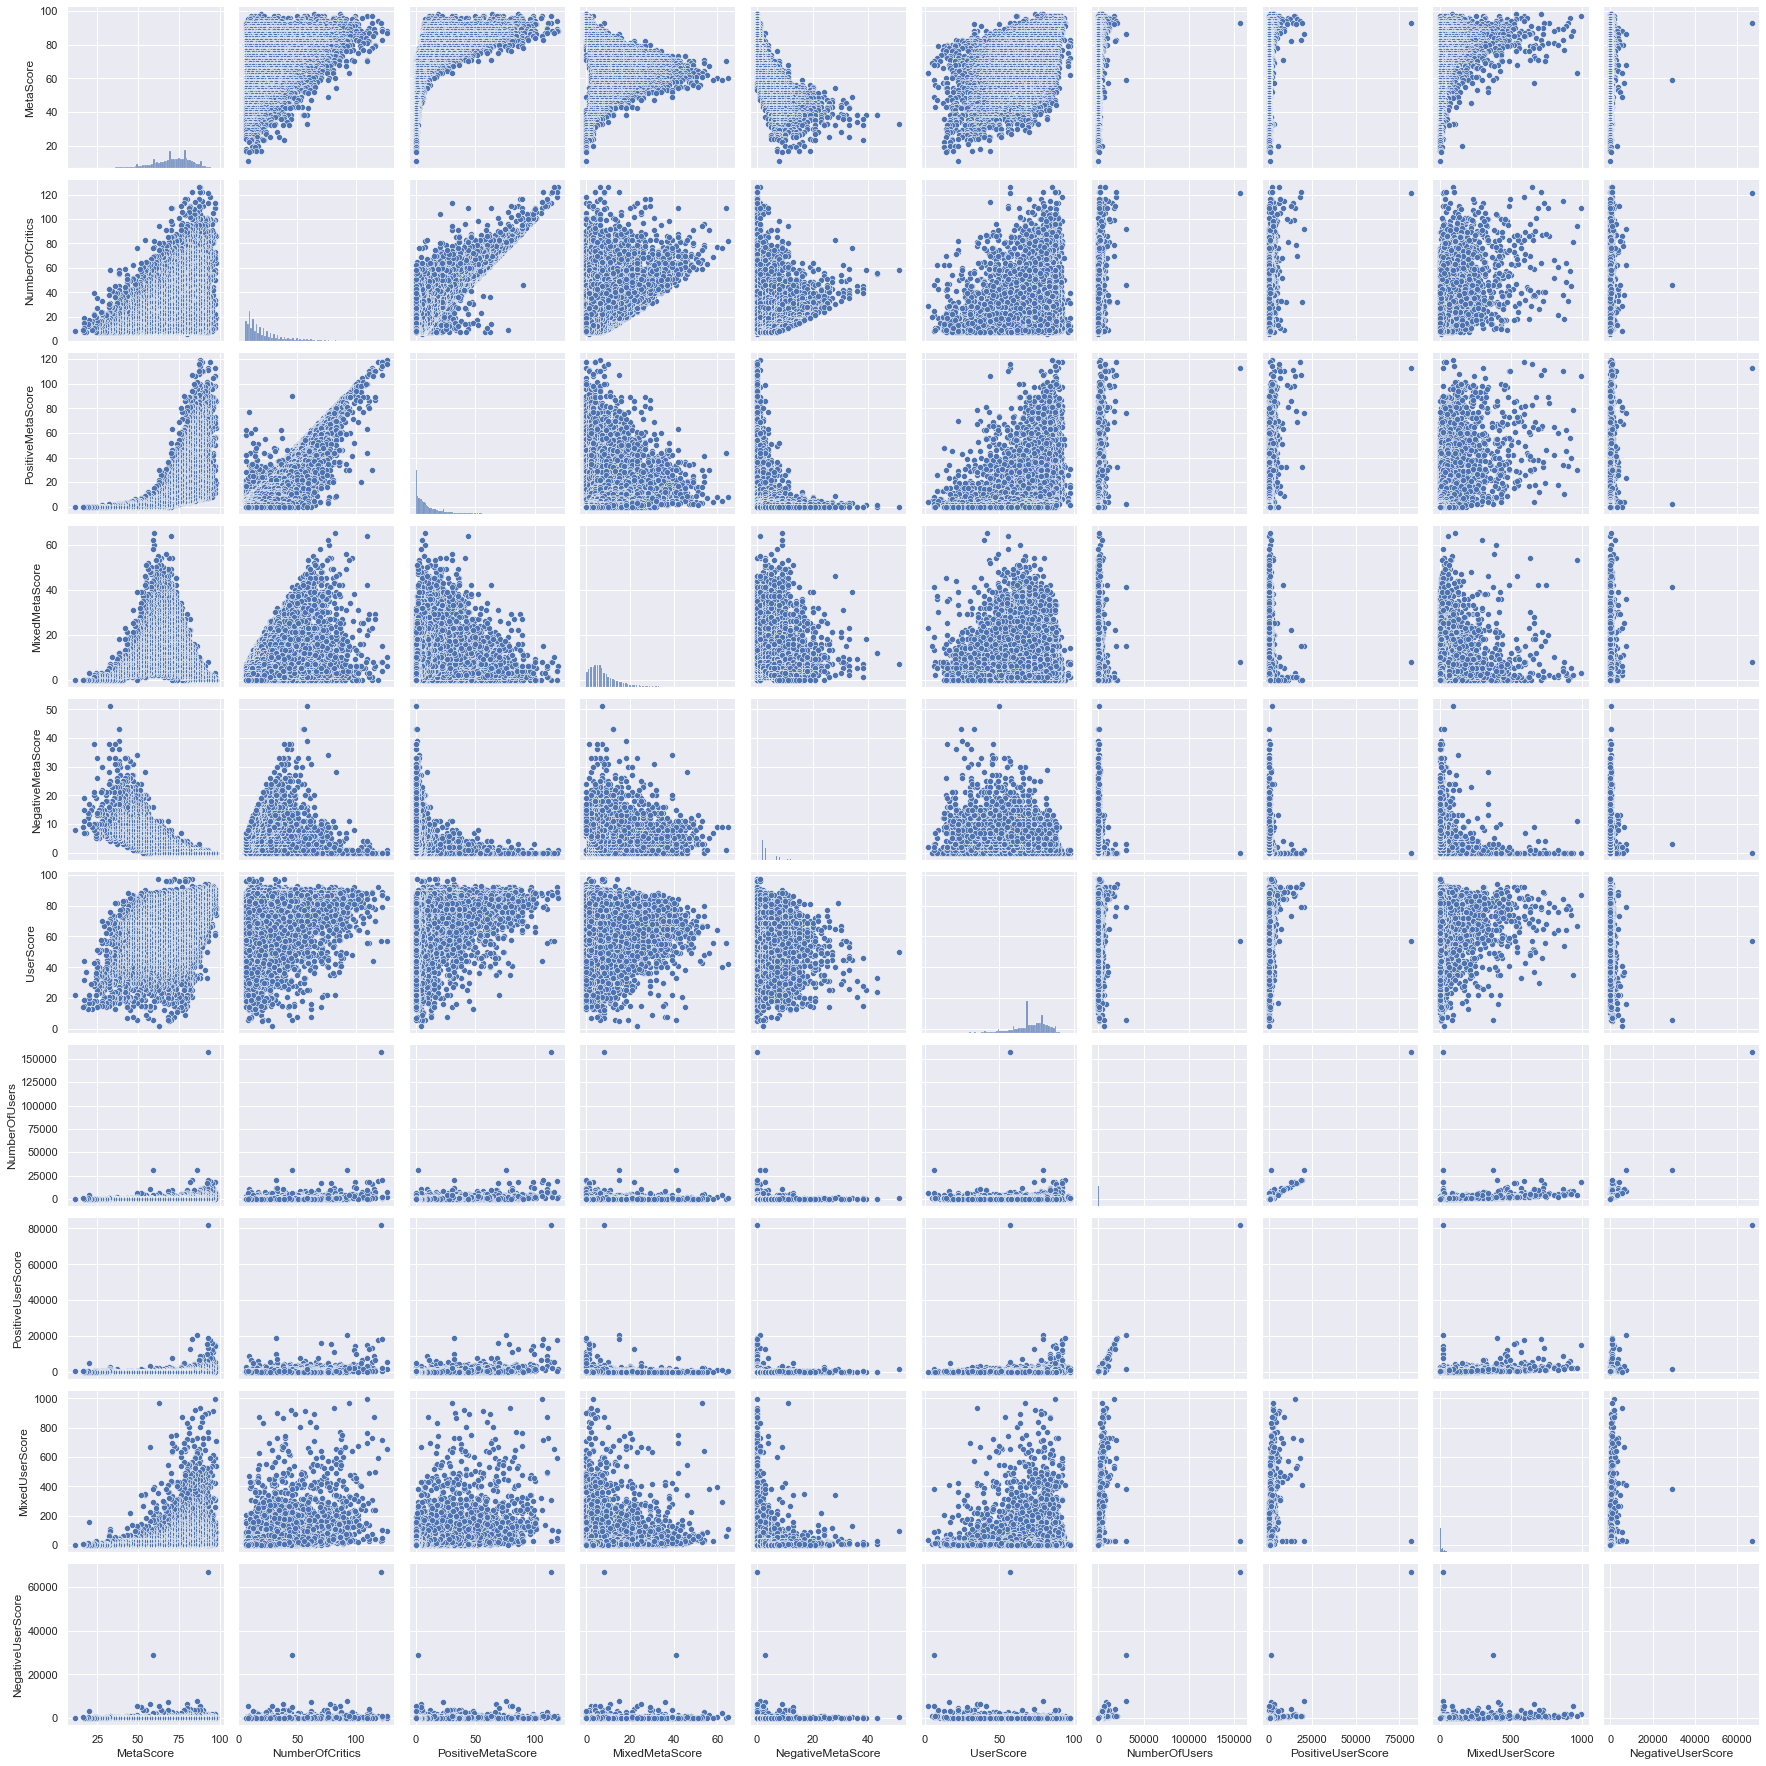

In [19]:
sns.pairplot(gamesDataFrame[['MetaScore', 'NumberOfCritics','PositiveMetaScore', 'MixedMetaScore', 'NegativeMetaScore', 'UserScore',
       'NumberOfUsers', 'PositiveUserScore', 'MixedUserScore','NegativeUserScore']])

Heatmap for the correlation of our attributes in the dataset

<AxesSubplot:>

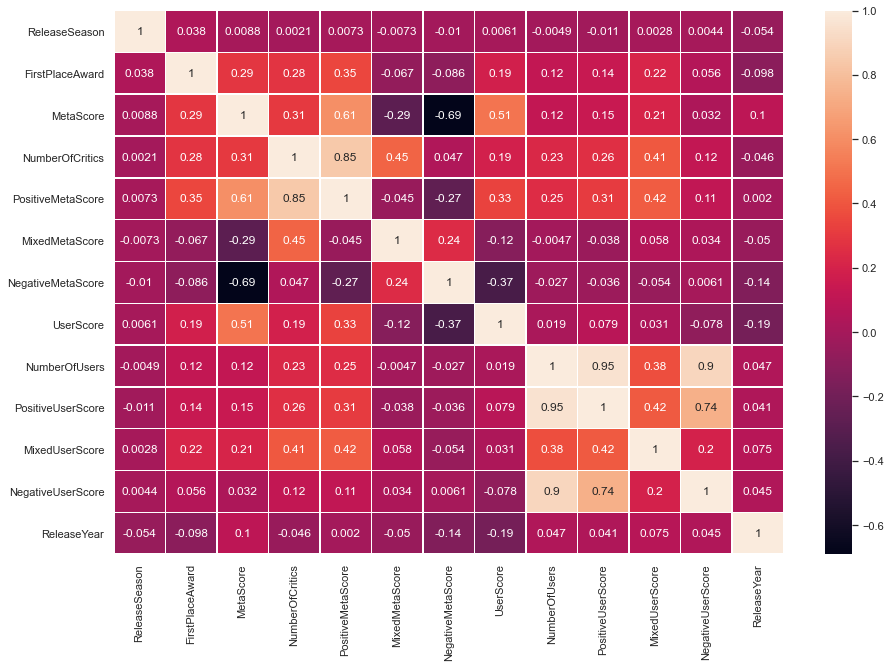

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(gamesDataFrame.corr(),annot=True,linewidth=0.5, linecolor='w')